In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df1=pd.read_csv('heroes_information.csv')
df2=pd.read_csv('super_hero_powers.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [5]:
df1.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [6]:
print ('Number of dimensions:',df1.ndim)
print ('Shape of dataset1:',df1.shape)
df1.isnull().sum()
#find number of duplicate names
print('Number duplicate names',df1['name'].duplicated().sum())

Number of dimensions: 2
Shape of dataset1: (734, 11)
Number duplicate names 19


In [7]:
df2.info()
print ('\n Number of dimensions:',df2.ndim)
print ('Shape of dataset1:',df2.shape)
df2.isnull().sum()
print('Number duplicate names',df2['hero_names'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB

 Number of dimensions: 2
Shape of dataset1: (667, 168)
Number duplicate names 0


In [8]:
df2.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


[Text(0, 0, 'Marvel Comics'),
 Text(0, 0, 'Dark Horse Comics'),
 Text(0, 0, 'DC Comics'),
 Text(0, 0, 'NBC - Heroes'),
 Text(0, 0, 'Wildstorm'),
 Text(0, 0, 'Image Comics'),
 Text(0, 0, 'Icon Comics'),
 Text(0, 0, 'SyFy'),
 Text(0, 0, 'Hanna-Barbera'),
 Text(0, 0, 'George Lucas'),
 Text(0, 0, 'Team Epic TV'),
 Text(0, 0, 'South Park'),
 Text(0, 0, 'HarperCollins'),
 Text(0, 0, 'ABC Studios'),
 Text(0, 0, 'Universal Studios'),
 Text(0, 0, 'Star Trek'),
 Text(0, 0, 'IDW Publishing'),
 Text(0, 0, 'Shueisha'),
 Text(0, 0, 'Sony Pictures'),
 Text(0, 0, 'J. K. Rowling'),
 Text(0, 0, 'Titan Books'),
 Text(0, 0, 'Rebellion'),
 Text(0, 0, 'Microsoft'),
 Text(0, 0, 'J. R. R. Tolkien')]

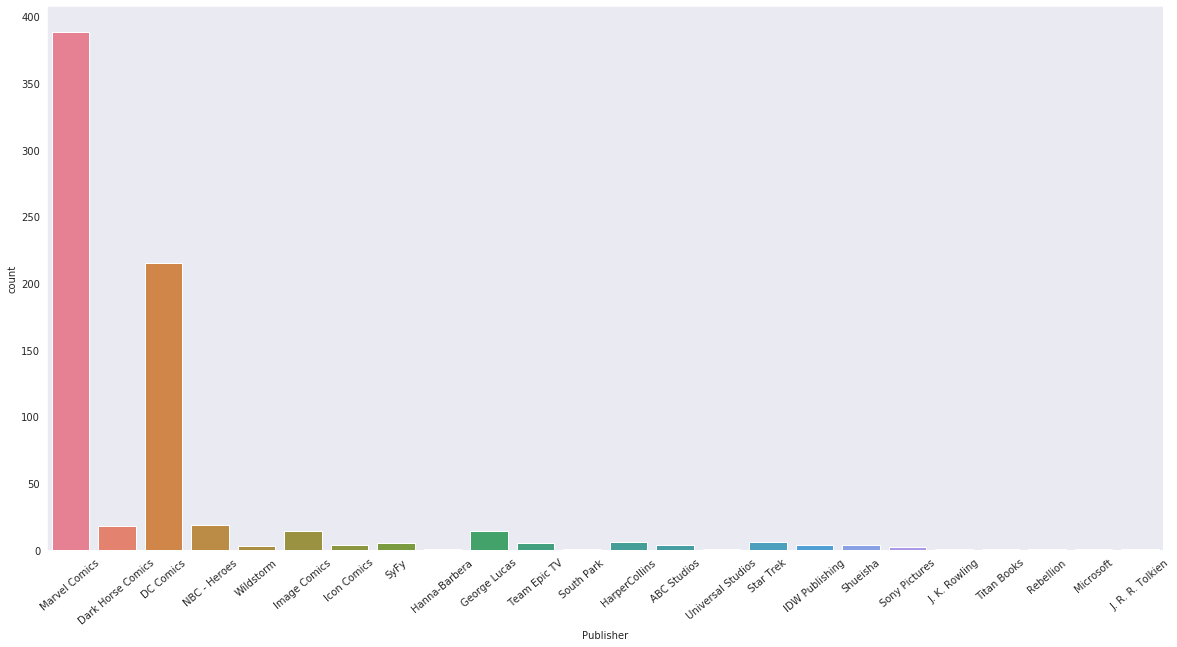

In [9]:
#count of superheroes per publisher
sns.set_style('dark')
plt.subplots(figsize=(20,10))
ax=sns.countplot(x='Publisher',data=df1,palette='husl')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)

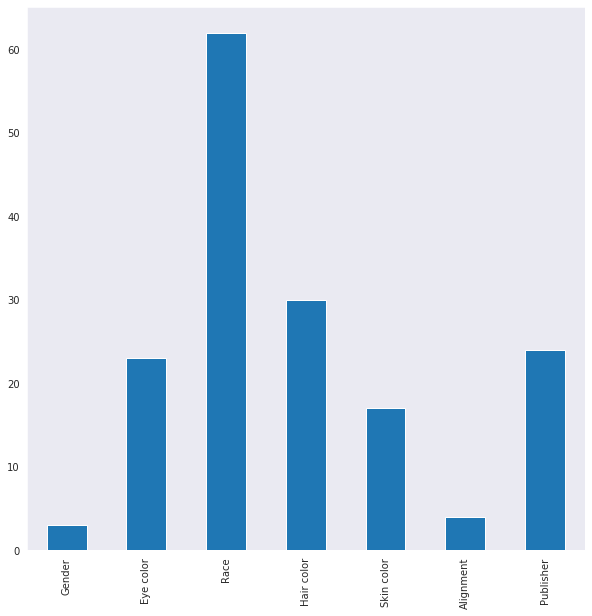

In [10]:
#provides number of attributes per category
labels=['Gender','Eye color','Race','Hair color','Skin color','Alignment','Publisher']
df1[labels]=df1[labels].replace('-','Unknown')
df1[labels]=df1[labels].apply(lambda x:x.astype('category'),axis=0)
unique_cat=df1[labels].apply(pd.Series.nunique,axis=0)
unique_cat.plot(kind='bar',figsize=(10,10))

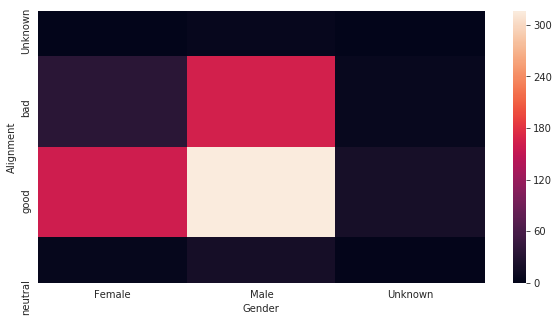

In [11]:
#alighment based on gender heatmap
sns.set_style("whitegrid")
plt.subplots(figsize=(10,5))
sns.heatmap(pd.crosstab(df1['Alignment'],df1['Gender']))

In [12]:
df2.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#counts for hero alignment, '-' denotes unknown
df1['Alignment'].value_counts()

good       496
bad        207
neutral     24
Unknown      7
Name: Alignment, dtype: int64

[Text(0, 0, 'Unknown'),
 Text(0, 0, 'bad'),
 Text(0, 0, 'good'),
 Text(0, 0, 'neutral')]

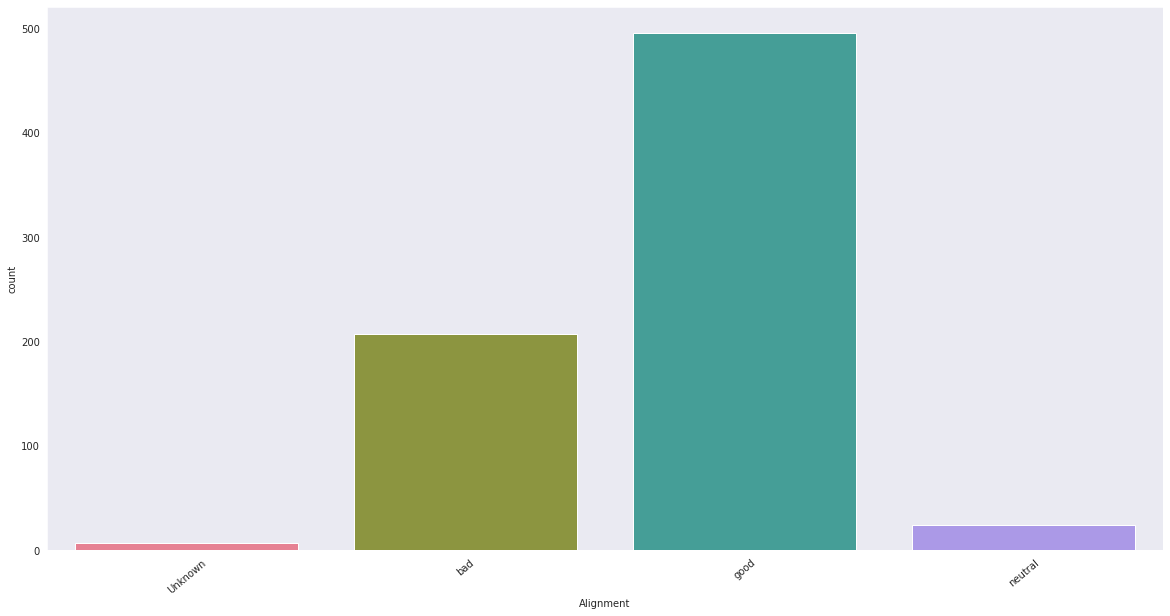

In [14]:
#bar graph for Alignment
sns.set_style('dark')
plt.subplots(figsize=(20,10))
ax=sns.countplot(x='Alignment',data=df1,palette='husl')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)

In [16]:
#rename column in df2 for merge
df2.rename(columns={'hero_names':'name'},inplace=True)
df2.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#combine datasets with name as index
df_new=df1.set_index('name').join(df2.set_index('name'))
df_new.to_csv('df_new.csv')
print(df_new)

                 Unnamed: 0  Gender Eye color               Race  \
name                                                               
A-Bomb                    0    Male    yellow              Human   
Abe Sapien                1    Male      blue      Icthyo Sapien   
Abin Sur                  2    Male      blue            Ungaran   
Abomination               3    Male     green  Human / Radiation   
Abraxas                   4    Male      blue      Cosmic Entity   
...                     ...     ...       ...                ...   
Yellowjacket II         729  Female      blue              Human   
Ymir                    730    Male     white        Frost Giant   
Yoda                    731    Male     brown     Yoda's species   
Zatanna                 732  Female      blue              Human   
Zoom                    733    Male       red            Unknown   

                       Hair color  Height          Publisher Skin color  \
name                                    

In [18]:
df_new.isnull().sum()


Unnamed: 0                0
Gender                    0
Eye color                 0
Race                      0
Hair color                0
                         ..
Phoenix Force            74
Molecular Dissipation    74
Vision - Cryo            74
Omnipresent              74
Omniscient               74
Length: 177, dtype: int64

In [19]:
f=lambda x:1 if x==True else 0 if x==False else 1 if x=="good" else 0 if x=="neutral" or "Unknown" else -1 if x=="bad" else x
adjusted=df_new.applymap(f)

In [20]:
a=adjusted.drop(columns=['Gender','Unnamed: 0','Eye color','Hair color','Race','Publisher','Height','Skin color','Weight'])

In [21]:
a.shape

(734, 168)

In [22]:
a.describe

<bound method NDFrame.describe of                  Alignment  Agility  Accelerated Healing  Lantern Power Ring  \
name                                                                           
A-Bomb                   1        0                    1                   0   
Abe Sapien               1        1                    1                   0   
Abin Sur                 1        0                    0                   1   
Abomination              0        0                    1                   0   
Abraxas                  0        0                    0                   0   
...                    ...      ...                  ...                 ...   
Yellowjacket II          1        0                    0                   0   
Ymir                     1        0                    0                   0   
Yoda                     1        1                    0                   0   
Zatanna                  1        0                    0                   0   
Zoom  

In [25]:
a.sum()

Alignment                496
Agility                  244
Accelerated Healing      181
Lantern Power Ring        11
Dimensional Awareness     25
                        ... 
Phoenix Force              1
Molecular Dissipation      1
Vision - Cryo              1
Omnipresent                2
Omniscient                 2
Length: 168, dtype: int64

In [26]:
a=a.dropna()
from sklearn.decomposition import PCA
X=a.iloc[:,2:]
y=a.iloc[:,1]

pca=PCA(n_components=2)
principalComponents=pca.fit_transform(X)
print(type(principalComponents))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(type(principalDf))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [27]:
print(principalDf.head())
print(principalDf.shape)


   principal component 1  principal component 2
0               0.483375              -0.411120
1               1.238226              -0.819922
2              -1.090570              -0.012187
3               0.654189              -0.140791
4               0.606487               1.442853
(734, 2)


In [98]:
print(a[['Alignment']])
print(a[['Alignment']].shape)

                 Alignment
name                      
A-Bomb                   1
Abe Sapien               1
Abin Sur                 1
Abomination             -1
Abraxas                 -1
Absorbing Man           -1
Adam Monroe              1
Adam Strange             1
Agent Bob                1
Agent Zero               1
Air-Walker              -1
Ajax                    -1
Alan Scott               1
Alex Mercer             -1
Alex Woolsly             1
Alien                   -1
Allan Quatermain         1
Amazo                   -1
Ammo                    -1
Ando Masahashi           1
Angel                    1
Angel                    1
Angel Dust               1
Angel Salvadore          1
Angela                  -1
Animal Man               1
Annihilus               -1
Ant-Man                  1
Ant-Man II               1
Anti-Monitor            -1
...                    ...
Vindicator               1
Violator                -1
Violet Parr              1
Vision                   1
V

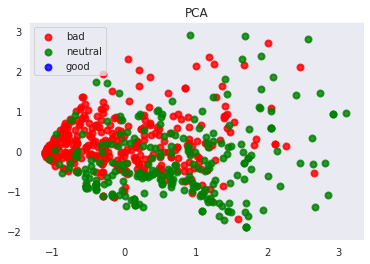

In [28]:

target_names = ['bad','neutral','good']

plt.figure()
colors = ['r', 'g', 'b']

lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(principalComponents[y == i, 0], principalComponents[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')


plt.show()
